Predictive maintenance allows early detection of failures based on historical data. This type of maintenance reduces unscheduled maintenance costs and incresases the lifespan of a machine. Generally 3 types of approaches exist in literature:
1. Using Life Time Data: Failures are anticipated before they occurs thanks to proportional hazard models and probability distributions of component failure times
2. Run-to-Failure Data: If run-to-failure data of many machines exists, then health state of a particular machine can be estimated by comparing the others.
3. Threshold Data: When historical or failure data does not exist, a degredation model can be created and failure time can be estimated with a threshold value.

In this work 'threshold data' approach is utilized because limited amount of run-to-failure data exist. Also bearings' features are suitable to create a degredation model. 


In [24]:
!pip install numpy
!pip install pandas
!pip install matplotlib

You should consider upgrading via the 'C:\Users\Douglas MACHADO\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Douglas MACHADO\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 7.6/7.6 MB 11.6 MB/s eta 0:00:00
     ---------------------------------------- 56.2/56.2 KB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 18.5 MB/s eta 0:00:00
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
     ------------------------------------- 181.9/181.9 KB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 17.3 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 KB 5.8 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


You should consider upgrading via the 'C:\Users\Douglas MACHADO\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [25]:
!pip install scipy

     ---------------------------------------- 44.3/44.3 MB 9.0 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Douglas MACHADO\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [27]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\Douglas MACHADO\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 9.3/9.3 MB 9.0 MB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 KB 18.2 MB/s eta 0:00:00


In [3]:
#importing necessary libraries
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit

# Merging Data

In [1]:
#Data paths
dataset_path_1st = 'data/1st_test/1st_test/'
dataset_path_2nd = 'data/2nd_test/2nd_test'
dataset_path_3rd = 'data/3rd_test/4th_test/txt'

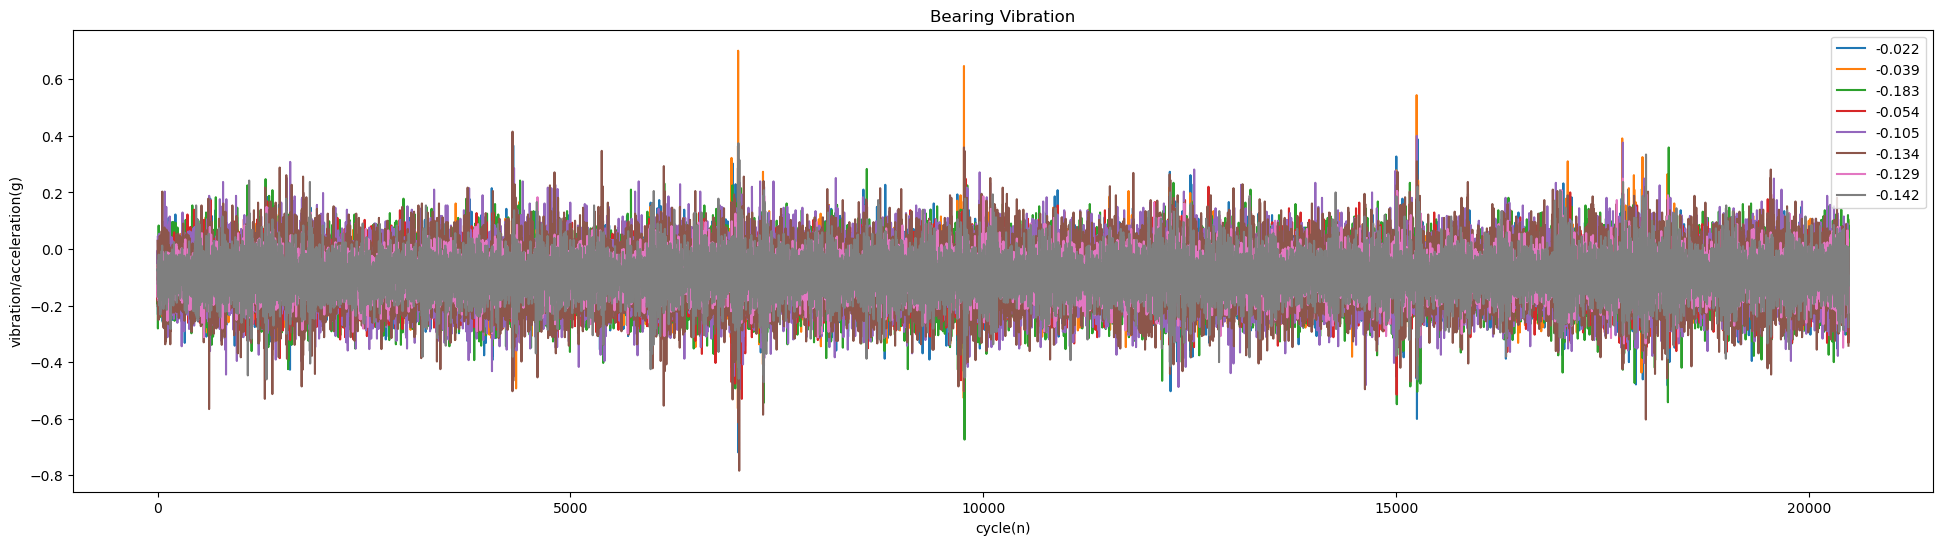

In [4]:
# Test for the first file
dataset = pd.read_csv('data/1st_test/1st_test/2003.10.22.12.06.24', sep='\t')
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

In [5]:
# Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result

def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']
    
    # initialize
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)

        
        
    for filename in os.listdir(dataset_path):
        # read dataset
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')
        
        # time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs
        
        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])
            
        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])
            
        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename] 
        
        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p,crest,clearence, shape, impulse], axis=1)
        
        # Exclude columns with all NA values before concatenation
        merge = merge.dropna(axis=1, how='all')

        data = pd.concat([data, merge])
        
    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]
        
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data                                  

1.  Calling feature extraction function defined above to merge extracted features      
2.  Saving as .csv file

In [6]:
set1 = time_features(dataset_path_1st, id_set=1)
set1.to_csv('set1_timefeatures.csv')

C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_6340\490012288.py:107: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, merge])


Reading Data again

In [10]:
set1 = pd.read_csv("./set1_timefeatures.csv")
set1 = set1.rename(columns={'Unnamed: 0':'time'})
#set1 = set1.set_index('time')
last_cycle = int(len(set1))

In [11]:
set1.columns

Index(['time', 'B1_x_mean', 'B1_x_std', 'B1_x_skew', 'B1_x_kurtosis',
       'B1_x_entropy', 'B1_x_rms', 'B1_x_max', 'B1_x_p2p', 'B1_x_crest',
       'B1_x_clearence', 'B1_x_shape', 'B1_x_impulse', 'B1_y_mean', 'B1_y_std',
       'B1_y_skew', 'B1_y_kurtosis', 'B1_y_entropy', 'B1_y_rms', 'B1_y_max',
       'B1_y_p2p', 'B1_y_crest', 'B1_y_clearence', 'B1_y_shape',
       'B1_y_impulse', 'B2_x_mean', 'B2_x_std', 'B2_x_skew', 'B2_x_kurtosis',
       'B2_x_entropy', 'B2_x_rms', 'B2_x_max', 'B2_x_p2p', 'B2_x_crest',
       'B2_x_clearence', 'B2_x_shape', 'B2_x_impulse', 'B2_y_mean', 'B2_y_std',
       'B2_y_skew', 'B2_y_kurtosis', 'B2_y_entropy', 'B2_y_rms', 'B2_y_max',
       'B2_y_p2p', 'B2_y_crest', 'B2_y_clearence', 'B2_y_shape',
       'B2_y_impulse', 'B3_x_mean', 'B3_x_std', 'B3_x_skew', 'B3_x_kurtosis',
       'B3_x_entropy', 'B3_x_rms', 'B3_x_max', 'B3_x_p2p', 'B3_x_crest',
       'B3_x_clearence', 'B3_x_shape', 'B3_x_impulse', 'B3_y_mean', 'B3_y_std',
       'B3_y_skew', 'B3_y_kurto

In [22]:
time = set1.time

df_B1 = set1[['time', 'B1_x_mean', 'B1_x_std', 'B1_x_skew', 'B1_x_kurtosis',
              'B1_x_entropy', 'B1_x_rms', 'B1_x_max', 'B1_x_p2p', 'B1_x_crest',
              'B1_x_clearence', 'B1_x_shape', 'B1_x_impulse',
              'B1_y_mean', 'B1_y_std', 'B1_y_skew', 'B1_y_kurtosis',
              'B1_y_entropy', 'B1_y_rms', 'B1_y_max', 'B1_y_p2p', 'B1_y_crest',
              'B1_y_clearence', 'B1_y_shape', 'B1_y_impulse',]].copy()

df_B1.sample(5)

,time,B1_x_mean,B1_x_std,B1_x_skew,B1_x_kurtosis,B1_x_entropy,B1_x_rms,B1_x_max,B1_x_p2p,B1_x_crest,...,B1_y_skew,B1_y_kurtosis,B1_y_entropy,B1_y_rms,B1_y_max,B1_y_p2p,B1_y_crest,B1_y_clearence,B1_y_shape,B1_y_impulse
673,2003-11-09 00:31:44,0.128504,0.097803,-0.005851,0.894053,5.032011,0.152812,0.679,1.101,4.443367,...,-0.035000,1.429374,4.839317,0.148462,0.830,1.282,5.590668,0.111763,1.177744,6.584375
2023,2003-11-24 05:01:24,0.129588,0.100176,-0.039945,0.827391,5.017271,0.154453,0.752,1.133,4.868781,...,0.070564,0.891167,4.928221,0.148650,0.613,1.175,4.123793,0.111662,1.178554,4.860113
1893,2003-11-23 05:16:56,0.130069,0.101310,-0.036793,1.126834,4.891972,0.155664,0.708,1.379,4.548248,...,0.076155,1.243890,4.910753,0.147566,0.627,1.149,4.248940,0.112213,1.170863,4.974928
1399,2003-11-18 13:22:30,0.130515,0.100406,-0.019839,1.350174,4.895662,0.155580,0.762,1.424,4.897807,...,0.093786,1.226120,4.813659,0.147766,0.662,1.255,4.480046,0.112868,1.167311,5.229607
1696,2003-11-21 17:46:56,0.129607,0.100280,-0.052168,1.268384,4.907153,0.154709,0.857,1.404,5.539449,...,0.123832,1.170614,4.923113,0.148604,0.598,1.142,4.024113,0.112454,1.173611,4.722742


In [23]:
df_B2 = set1[['time', 'B2_x_mean', 'B2_x_std', 'B2_x_skew', 'B2_x_kurtosis',
              'B2_x_entropy', 'B2_x_rms', 'B2_x_max', 'B2_x_p2p', 'B2_x_crest',
              'B2_x_clearence', 'B2_x_shape', 'B2_x_impulse',
              'B2_y_mean', 'B2_y_std', 'B2_y_skew', 'B2_y_kurtosis',
              'B2_y_entropy', 'B2_y_rms', 'B2_y_max', 'B2_y_p2p', 'B2_y_crest',
              'B2_y_clearence', 'B2_y_shape', 'B2_y_impulse',]].copy()
df_B2.sample(5)

,time,B2_x_mean,B2_x_std,B2_x_skew,B2_x_kurtosis,B2_x_entropy,B2_x_rms,B2_x_max,B2_x_p2p,B2_x_crest,...,B2_y_skew,B2_y_kurtosis,B2_y_entropy,B2_y_rms,B2_y_max,B2_y_p2p,B2_y_crest,B2_y_clearence,B2_y_shape,B2_y_impulse
190,2003-10-29 20:19:46,0.125665,0.093799,-0.084711,0.258971,5.019593,0.149766,0.735,1.035,4.907663,...,0.003681,0.279536,4.902107,0.141032,0.515,0.757,3.651653,0.108484,1.161892,4.242828
1167,2003-11-16 09:08:46,0.125475,0.092820,-0.085690,0.422263,4.953608,0.149085,0.784,1.096,5.258731,...,-0.033528,0.539496,4.835846,0.139376,0.647,0.923,4.642107,0.109536,1.149146,5.334458
2096,2003-11-24 20:17:32,0.129492,0.100827,-0.044051,0.327758,5.126212,0.154773,0.740,1.021,4.781201,...,-0.032717,0.383459,4.920878,0.144297,0.723,1.040,5.010510,0.109639,1.169640,5.860495
42,2003-10-22 15:37:48,0.107124,0.090616,-0.079439,0.100572,5.020226,0.130396,0.544,0.927,4.171893,...,-0.064780,0.375235,4.860323,0.121541,0.542,0.789,4.459413,0.089165,1.192431,5.317541
2051,2003-11-24 12:53:55,0.129834,0.100495,-0.046802,0.269039,5.098351,0.155384,0.698,1.059,4.492105,...,-0.009484,0.339130,4.924337,0.144068,0.525,0.806,3.644100,0.110787,1.162276,4.235450


In [26]:
df_B3 = set1[['time', 'B3_x_mean', 'B3_x_std', 'B3_x_skew', 'B3_x_kurtosis',
              'B3_x_entropy', 'B3_x_rms', 'B3_x_max', 'B3_x_p2p', 'B3_x_crest',
              'B3_x_clearence', 'B3_x_shape', 'B3_x_impulse',
              'B3_y_mean', 'B3_y_std', 'B3_y_skew', 'B3_y_kurtosis',
              'B3_y_entropy', 'B3_y_rms', 'B3_y_max', 'B3_y_p2p', 'B3_y_crest',
              'B3_y_clearence', 'B3_y_shape', 'B3_y_impulse',]].copy()

df_B3.head(5)

,time,B3_x_mean,B3_x_std,B3_x_skew,B3_x_kurtosis,B3_x_entropy,B3_x_rms,B3_x_max,B3_x_p2p,B3_x_crest,...,B3_y_skew,B3_y_kurtosis,B3_y_entropy,B3_y_rms,B3_y_max,B3_y_p2p,B3_y_crest,B3_y_clearence,B3_y_shape,B3_y_impulse
0,2003-10-22 12:06:24,0.106149,0.091465,0.034351,0.405671,5.027652,0.128888,0.496,0.896,3.848299,...,-0.022286,0.777436,4.930004,0.131821,0.784,1.199,5.947458,0.093392,1.218868,7.249168
1,2003-10-22 12:09:13,0.106661,0.091737,0.001111,0.445954,4.985830,0.129564,0.566,1.059,4.368499,...,-0.028728,0.682840,5.057130,0.132052,0.576,0.993,4.361910,0.093646,1.217537,5.310789
2,2003-10-22 12:14:13,0.108740,0.091817,0.053031,0.389962,5.033128,0.131339,0.601,0.987,4.575934,...,0.019566,0.751218,5.051882,0.133295,0.620,0.984,4.651352,0.095119,1.213143,5.642756
3,2003-10-22 12:19:13,0.108068,0.092386,-0.023744,0.262551,5.040658,0.131078,0.552,0.874,4.211240,...,-0.008438,0.667691,5.040340,0.133972,0.684,1.036,5.105532,0.094920,1.217818,6.217610
4,2003-10-22 12:24:13,0.108454,0.091936,0.027091,0.326403,5.032258,0.131309,0.527,0.998,4.013429,...,-0.024844,0.475547,5.030937,0.133282,0.623,1.055,4.674301,0.094207,1.218861,5.697322


In [25]:
df_B4 = set1[['time', 'B4_x_mean', 'B4_x_std', 'B4_x_skew', 'B4_x_kurtosis',
              'B4_x_entropy', 'B4_x_rms', 'B4_x_max', 'B4_x_p2p', 'B4_x_crest',
              'B4_x_clearence', 'B4_x_shape', 'B4_x_impulse',
              'B4_y_mean', 'B4_y_std', 'B4_y_skew', 'B4_y_kurtosis',
              'B4_y_entropy', 'B4_y_rms', 'B4_y_max', 'B4_y_p2p', 'B4_y_crest',
              'B4_y_clearence', 'B4_y_shape', 'B4_y_impulse',]].copy()

df_B4.sample(5)

,time,B4_x_mean,B4_x_std,B4_x_skew,B4_x_kurtosis,B4_x_entropy,B4_x_rms,B4_x_max,B4_x_p2p,B4_x_crest,...,B4_y_skew,B4_y_kurtosis,B4_y_entropy,B4_y_rms,B4_y_max,B4_y_p2p,B4_y_crest,B4_y_clearence,B4_y_shape,B4_y_impulse
97,2003-10-23 00:34:13,0.098833,0.067464,0.045970,1.108508,4.716489,0.114962,0.518,0.794,4.505836,...,0.001181,1.373172,4.757713,0.116196,0.447,0.730,3.846954,0.087869,1.174910,4.519826
1178,2003-11-16 10:58:46,0.119213,0.073876,-0.006023,0.927107,4.808783,0.136539,0.574,0.813,4.203933,...,-0.025165,1.122780,4.882770,0.140355,0.571,0.886,4.068268,0.108877,1.158399,4.712677
383,2003-11-01 02:31:44,0.120674,0.081080,-0.050200,1.777045,4.861003,0.139997,0.657,1.045,4.692944,...,0.121603,2.193767,4.825862,0.140743,0.576,1.142,4.092562,0.108634,1.163275,4.760776
1592,2003-11-20 18:54:03,0.126586,0.094677,0.048451,1.738930,4.888928,0.149582,0.708,1.235,4.733194,...,0.045661,1.230199,5.073301,0.153871,0.637,1.089,4.139837,0.112891,1.197218,4.956288
919,2003-11-14 15:22:17,0.118938,0.070963,0.077121,0.718248,4.773776,0.135234,0.454,0.713,3.357149,...,0.010881,0.780520,4.845113,0.138246,0.530,0.808,3.833746,0.108447,1.150436,4.410480


In [133]:
import plotly.graph_objects as go
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal.windows import hamming


def plot_fft(signal1, signal2, signal3, name1 = 'x1', name2='x2', name3='x3', plot_title='FFT plot', signal_length=None):
    
    signal1 = signal1 - np.mean(signal1)
    signal2 = signal2 - np.mean(signal2)
    signal3 = signal3 - np.mean(signal3)
    
    N = len(signal1)
    T = 1 / N
    
    y1 = signal1
    y2 = signal2
    y3 = signal3
    
    w = hamming(N)
    
    yf1 = np.abs(fft(y1*w))**2
    yf2 = np.abs(fft(y2*w))**2
    yf3 = np.abs(fft(y3*w))**2
    
    
    
    xf = fftfreq(N, T)[:N//2]
    
    if not signal_length:
        signal_length = N//2
    else:
        pass
    
    # Plot using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=xf[1:signal_length], y=2.0/N * np.abs(yf1[1:signal_length]), mode='lines', line=dict(color='blue'), name = name1))
    fig.add_trace(go.Scatter(x=xf[1:signal_length], y=2.0/N * np.abs(yf2[1:signal_length]), mode='lines', line=dict(color='red'), name = name2))
    fig.add_trace(go.Scatter(x=xf[1:signal_length], y=2.0/N * np.abs(yf3[1:signal_length]), mode='lines', line=dict(color='green'), name = name3))
    
    # Customize layout
    fig.update_layout(title=plot_title,
                      xaxis_title='Frequency (Hz)',
                      yaxis_title='Amplitude',
                      legend=dict(title='Legend', traceorder='reversed'),
                      yaxis=dict(range=[0, 1]))
    
    fig.show()


In [134]:
# Assuming you have a header row in the CSV file, you can use header=0
x1_beginning1 = pd.read_csv('data/1st_test/1st_test/2003.10.22.12.06.24', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_beginning2 = pd.read_csv('data/1st_test/1st_test/2003.10.22.12.09.13', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_beginning3 = pd.read_csv('data/1st_test/1st_test/2003.10.22.12.14.13', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_end1 = pd.read_csv('data/1st_test/1st_test/2003.11.25.23.19.56', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_end2 = pd.read_csv('data/1st_test/1st_test/2003.11.25.23.29.56', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_end3 = pd.read_csv('data/1st_test/1st_test/2003.11.25.23.39.56', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

plot_fft(signal1 = x1_beginning1.B1_x.values,
         signal2 = x1_beginning2.B1_x.values,
         signal3 = x1_beginning3.B1_x.values,
         name1='X1',
         name2='X2',
         name3='X3',
         plot_title='FFT plot of initial signals', signal_length = 1000)

plot_fft(signal1 = x1_end1.B1_x.values,
         signal2 = x1_end2.B1_x.values,
         signal3 = x1_end3.B1_x.values,
         name1='Xn-2',
         name2='Xn-1',
         name3='Xn',
         plot_title='FFT plot of final signals',
         signal_length=1000)

In [139]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.fft import fft, fftfreq
from scipy.signal import hamming

dataset_path = dataset_path_1st
integration_array = []

for filename in os.listdir(dataset_path):
    df_raw_signal = pd.read_csv(os.path.join(dataset_path, filename), sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])
    signal1 = df_raw_signal.B1_y.values
    signal1 = signal1 - np.mean(signal1)
    
    N = len(signal1)
    T = 1 / N
    w = hamming(N)
    yf1 = fft(signal1*w)
    yf1_abs_sq = np.abs(yf1)**2
    
    integrated_s1 = sum(yf1_abs_sq[83:500])
    integration_array.append(integrated_s1)

# Plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(integration_array))), y=integration_array, mode='lines', line=dict(color='blue')))
fig.update_layout(title='Integrated Signal Power',
                  xaxis_title='File Index',
                  yaxis_title='Integrated Power',
                  legend=dict(title='Legend', traceorder='reversed'))
fig.show()


C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_6340\3931911657.py:18: DeprecationWarning:

Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.

C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_6340\3931911657.py:18: DeprecationWarning:

Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.

C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_6340\3931911657.py:18: DeprecationWarning:

Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.

C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_6340\3931911657.py:18: DeprecationWarning:

Importing h